In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf

In [15]:
# Download Google stock data
data = yf.download('GOOG', start='2015-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Selecting 'Close' price
closing_prices = data[['Close']]


In [4]:

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(closing_prices)

In [5]:
# Prepare dataset for LSTM
sequence_length = 60  # Lookback days
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [6]:
# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - loss: 0.0271 - val_loss: 0.0017
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.

In [8]:
# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


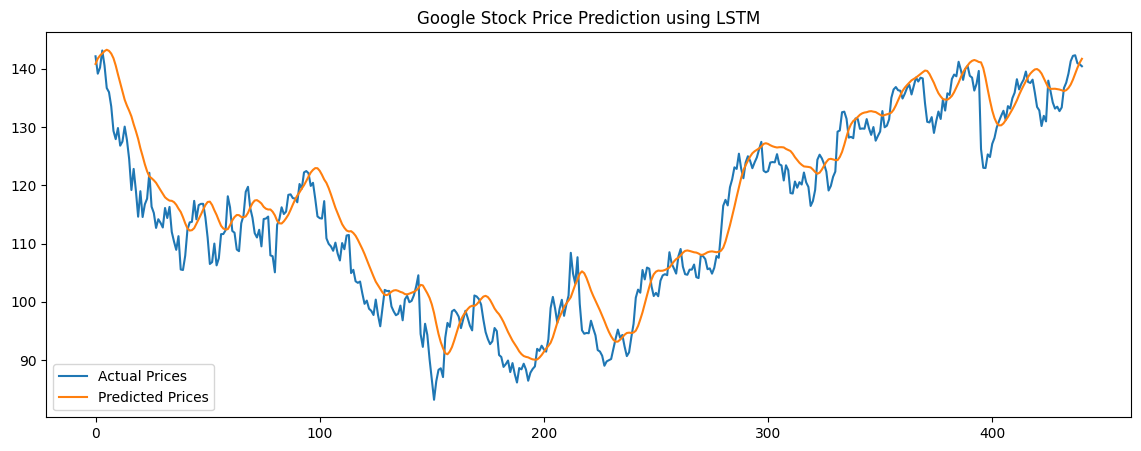

In [9]:
# Plot results
plt.figure(figsize=(14,5))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.title('Google Stock Price Prediction using LSTM')
plt.show()